# Deep Neural Nets
We will train a well known dataset known as the fashion mnist.

# Import Dependencies

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf

In [ ]:
print("tf: "+tf.__version__)
print("sk: "+sklearn.__version__)

tf: 2.4.1
sk: 0.22.2.post1


# 1. Building a DNN based Image Classifier

We will build a simple apparel classifier by training models on the very famous [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset based on Zalando’s article images — consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. The idea is to classify these images into an apparel category amongst 10 categories on which we will be training our models on.

Here's an example how the data looks (each class takes three-rows):

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. You can access the Fashion MNIST directly from TensorFlow.

__Note:__ Although these are really images, they are loaded as NumPy arrays and not binary image objects.

## 1.1: Understanding the data

In [ ]:
#load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#check the dimensions of the dataset
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

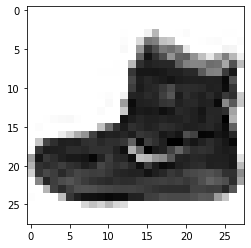

In [ ]:
#display a single training example
plt.imshow(X_train[0], cmap="binary");

We scale the pixel intensities down to the 0-1 range by dividing by 255 and convert them to floats (NNs like normalized inputs).

In [ ]:
#normalize the data
X_train = X_train / 255.
X_test = X_test / 255.

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

The first image in the training set is a Ankle Boot:

In [ ]:
class_names[y_train[0]]

'Ankle boot'

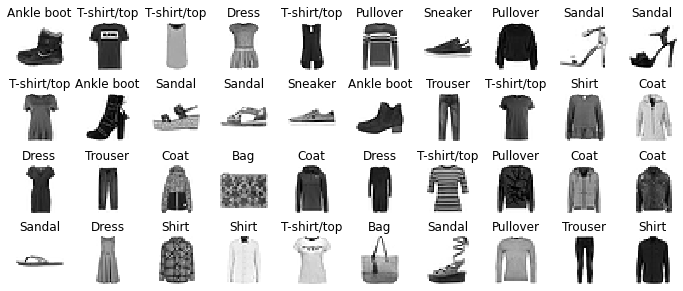

In [ ]:
#displaying a few of the dataset samples
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5);

In [ ]:
#to use the same set of numbers for initialization
np.random.seed(42)
tf.random.set_seed(42)

## 1.2: Building a 2-layer DNN

We build a `Sequential` model (`tf.keras.models.Sequential`) and add four layers to it:
  * a `Flatten` layer (`tf.keras.layers.Flatten`) to convert each 28x28 image to a single row of 784 pixel values. Since it is the first layer in your model, you should specify the `input_shape` argument, leaving out the batch size: `[28, 28]`.
  * a `Dense` layer  (`tf.keras.layers.Dense`) with 300 neurons (aka units), and the `"relu"` activation function.
  * Another `Dense` layer with 100 neurons, also with the `"relu"` activation function.
  * A final `Dense` layer with 10 neurons (one per class), and with the `"softmax"` activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.

In [ ]:
#building the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")                                   
])

After a model is created, we must call its `compile()` method to specify the `loss` function and the `optimizer` to use. In this case, we will use the `"sparse_categorical_crossentropy"` loss, and the `keras.optimizers.SGD(lr=1e-3)` optimizer (stochastic gradient descent with learning rate of 1e-3). We specify `metrics=["accuracy"]`.

In [ ]:
#defining loss function and optimizer
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=tf.keras.optimizers.SGD(1e-3), #0.001 / SGD
              metrics=["accuracy"])

#provides a summary of the model including number of parameters and shape at each layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 1.3: Train & Test

Now the model is ready to be trained. We call its `fit()` method, passing in it the input features (`X_train`) and the target classes (`y_train`). We will perform 10 epochs so `epochs=10` (or else it will just run for a single epoch). We can also (optionally) pass 10% validation data by setting `validation_split=0.1`. If we include that, Keras will compute the loss and the additional metrics (the accuracy in this case) on the validation set at the end of each epoch. If the performance on the training set is much better than on the validation set, the model is probably overfitting the training set (or there is a bug, such as a mismatch between the training set and the validation set).
**Note**: the `fit()` method will return a `History` object containing training stats. Make sure to preserve it (`history = model.fit(...)`).

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 1.8558 - accuracy: 0.4260 - val_loss: 1.0122 - val_accuracy: 0.7038
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.9390 - accuracy: 0.7182 - val_loss: 0.7603 - val_accuracy: 0.7528
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7346 - accuracy: 0.7656 - val_loss: 0.6677 - val_accuracy: 0.7748
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6616 - accuracy: 0.7858 - val_loss: 0.6158 - val_accuracy: 0.7897
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6080 - accuracy: 0.8027 - val_loss: 0.5773 - val_accuracy: 0.8048
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5788 - accuracy: 0.8114 - val_loss: 0.5563 - val_accuracy: 0.8138
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5490 - accuracy: 0.8181 - val_loss: 0.5312 - val_accuracy:

Running `pd.DataFrame(history.history).plot()` to plot the learning curves.

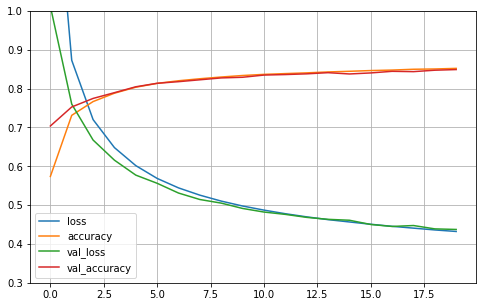

In [ ]:
#plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.3, 1);

Calling the model's `predict()` method to estimate the probability of each class for each instance

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(10000, 10)
[[2.8881133e-05 5.6970639e-06 4.0106475e-05 ... 2.1443817e-01
  5.3752935e-03 6.3758820e-01]
 [4.4833991e-04 1.9056462e-05 7.7781183e-01 ... 1.1899444e-10
  4.4417175e-05 4.3204298e-09]
 [2.1404401e-05 9.9986267e-01 4.4027192e-06 ... 8.8315757e-11
  9.0280008e-07 5.7891558e-09]
 ...
 [7.7513345e-02 1.6420503e-04 2.3960168e-03 ... 3.3755627e-04
  7.2736692e-01 1.4694784e-04]
 [1.2200265e-04 9.9757594e-01 2.4203277e-05 ... 2.7633824e-08
  9.2934242e-06 3.1297166e-06]
 [5.4312445e-04 1.8317517e-04 9.9126180e-04 ... 1.5499370e-01
  2.5228469e-02 2.4105506e-02]]


Here we are only interested in the most likely class. We use `np.argmax()` to get the class ID of the most likely class for each instance. **Tip**: you want to set `axis=1`.

In [ ]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

print(accuracy_score(y_test, y_pred))

0.8367
